# Comparative Analysis
In this notebook, we compare FLOSS with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
thresholds = np.round(np.arange(.05, 1., .05), 2)
methods = list()

for t in thresholds:
    candidate_name = f"{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/floss_threshold/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,0.05-threshold,0.1-threshold,0.15-threshold,0.2-threshold,0.25-threshold,0.3-threshold,0.35-threshold,0.4-threshold,0.45-threshold,0.5-threshold,0.55-threshold,0.6-threshold,0.65-threshold,0.7-threshold,0.75-threshold,0.8-threshold,0.85-threshold,0.9-threshold,0.95-threshold
0,DodgerLoopDay,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.892,0.892,0.892,0.620
1,EEGRat,0.500,0.500,0.500,0.500,0.806,0.806,0.806,0.806,0.806,0.688,0.688,0.688,0.688,0.688,0.688,0.688,0.688,0.547,0.547
2,EEGRat2,0.500,0.500,0.500,0.500,0.759,0.759,0.759,0.659,0.746,0.746,0.746,0.746,0.646,0.540,0.322,0.322,0.322,0.322,0.322
3,FaceFour,0.281,0.281,0.281,0.281,0.281,0.281,0.566,0.566,0.559,0.559,0.684,0.632,0.631,0.430,0.430,0.430,0.322,0.322,0.322
4,GrandMalSeizures2,0.508,0.508,0.508,0.508,0.508,0.934,0.873,0.814,0.776,0.680,0.642,0.415,0.341,0.341,0.303,0.264,0.224,0.224,0.185
5,GreatBarbet1,0.983,0.983,0.889,0.756,0.649,0.549,0.500,0.500,0.500,0.424,0.424,0.424,0.424,0.369,0.369,0.369,0.273,0.245,0.245
6,Herring,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.566,0.566,0.614,0.658,0.528,0.439
8,InsectEPG1,0.653,0.995,0.936,0.786,0.786,0.735,0.654,0.479,0.445,0.410,0.410,0.410,0.410,0.350,0.350,0.350,0.350,0.350,0.350
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.415,0.382,0.491,0.477,0.436,0.315,0.257,0.257,0.252,0.245,0.339,0.319,0.273


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2030/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


0.05-threshold    0.492
0.1-threshold     0.538
0.15-threshold    0.561
0.2-threshold     0.548
0.25-threshold    0.584
0.3-threshold     0.644
0.35-threshold    0.652
0.4-threshold     0.629
0.45-threshold    0.645
0.5-threshold     0.614
0.55-threshold    0.599
0.6-threshold     0.549
0.65-threshold    0.526
0.7-threshold     0.489
0.75-threshold    0.469
0.8-threshold     0.444
0.85-threshold    0.420
0.9-threshold     0.389
0.95-threshold    0.359
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2030/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


0.05-threshold    0.265
0.1-threshold     0.272
0.15-threshold    0.269
0.2-threshold     0.253
0.25-threshold    0.266
0.3-threshold     0.270
0.35-threshold    0.229
0.4-threshold     0.223
0.45-threshold    0.232
0.5-threshold     0.211
0.55-threshold    0.203
0.6-threshold     0.214
0.65-threshold    0.212
0.7-threshold     0.220
0.75-threshold    0.230
0.8-threshold     0.221
0.85-threshold    0.220
0.9-threshold     0.209
0.95-threshold    0.182
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

0.05-threshold:wins=3 rank=9.57143
0.1-threshold:wins=4 rank=8.14286
0.15-threshold:wins=3 rank=7.33333
0.2-threshold:wins=3 rank=7.57143
0.25-threshold:wins=5 rank=6.28571
0.3-threshold:wins=7 rank=5.14286
0.35-threshold:wins=6 rank=4.42857
0.4-threshold:wins=5 rank=4.42857
0.45-threshold:wins=6 rank=4.71429
0.5-threshold:wins=4 rank=4.90476
0.55-threshold:wins=4 rank=5.57143
0.6-threshold:wins=4 rank=7.0
0.65-threshold:wins=4 rank=7.52381
0.7-threshold:wins=3 rank=9.33333
0.75-threshold:wins=4 rank=9.28571
0.8-threshold:wins=1 rank=11.52381
0.85-threshold:wins=2 rank=11.7619
0.9-threshold:wins=2 rank=13.19048
0.95-threshold:wins=1 rank=14.09524


Let's plot and output the ranks.

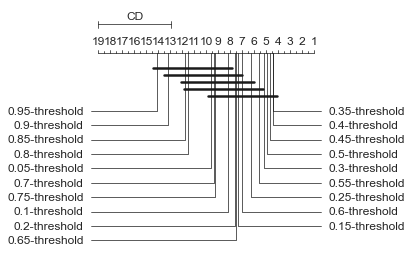

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5, filename="../../figures/cd_ablation_floss_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [11]:
selection = "0.35-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

0.35-threshold vs 0.05-threshold: (wins/ties/losses): 13/7/1
0.35-threshold vs 0.1-threshold: (wins/ties/losses): 11/7/3
0.35-threshold vs 0.15-threshold: (wins/ties/losses): 10/7/4
0.35-threshold vs 0.2-threshold: (wins/ties/losses): 10/7/4
0.35-threshold vs 0.25-threshold: (wins/ties/losses): 7/9/5
0.35-threshold vs 0.3-threshold: (wins/ties/losses): 4/11/6
0.35-threshold vs 0.4-threshold: (wins/ties/losses): 7/12/2
0.35-threshold vs 0.45-threshold: (wins/ties/losses): 10/7/4
0.35-threshold vs 0.5-threshold: (wins/ties/losses): 10/5/6
0.35-threshold vs 0.55-threshold: (wins/ties/losses): 10/4/7
0.35-threshold vs 0.6-threshold: (wins/ties/losses): 12/4/5
0.35-threshold vs 0.65-threshold: (wins/ties/losses): 12/3/6
0.35-threshold vs 0.7-threshold: (wins/ties/losses): 15/2/4
0.35-threshold vs 0.75-threshold: (wins/ties/losses): 14/2/5
0.35-threshold vs 0.8-threshold: (wins/ties/losses): 17/1/3
0.35-threshold vs 0.85-threshold: (wins/ties/losses): 17/1/3
0.35-threshold vs 0.9-threshold: 

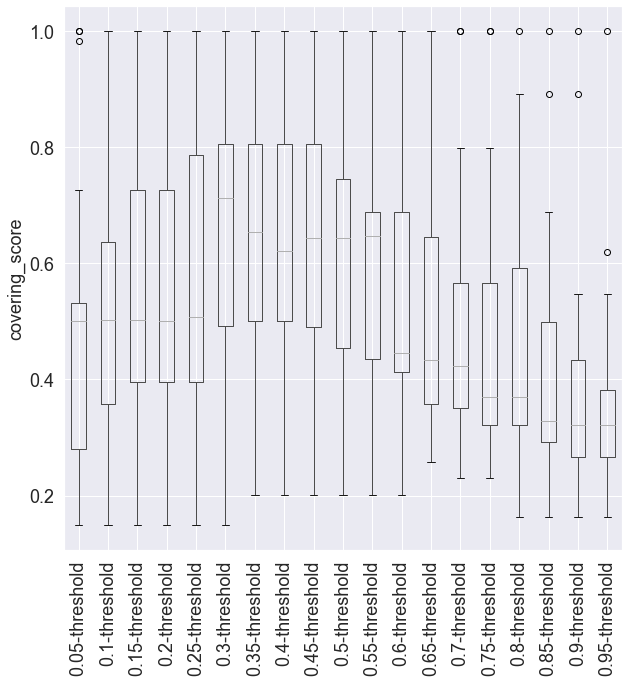

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig("../../figures/bp_ablation_floss_threshold.pdf", bbox_inches="tight") 